# Chevaliers de Josèphe

Le problème de Josèphe ou de Joséphus énoncé la première fois par un histographe juif romain du 1er siècle Flavius Josèphe est un problème de permutations. 

## Enoncé (tiré de [wikipédia](https://fr.wikipedia.org/wiki/Probl%C3%A8me_de_Jos%C3%A8phe))

>Des soldats juifs, cernés par des soldats romains, décident de former un cercle. Un premier soldat est choisi au hasard et est exécuté, le troisième à partir de sa gauche (ou droite) est ensuite exécuté. Tant qu'il y a des soldats, la sélection continue. Le but est de trouver à quel endroit doit se tenir un soldat pour être le dernier. Josèphe, peu enthousiaste à l'idée de mourir, parvint à trouver l'endroit où se tenir. Quel est-il ?

>Ce problème de permutations peut être complexifié, par exemple en faisant varier le nombre de soldats à « sauter », en demandant une solution générale pour un nombre fixe de soldats ou en demandant un certain nombre de survivants.

## Modélisons... un premier contact

Dans l'énoncé original le premier exécuté est choisi aléatoirement puis le *pas* (ie tous les combien de chevaliers s'effectue la mise à mort) est 3. 

La chaîne youtube Numberphile propose une présentation avec un pas de 2, très bien faite : https://www.youtube.com/watch?v=uCsD3ZGzMgE Le premier chevalier exécuté porte le numéro 2 : en gros on dit que le 1 exécute le 2, puis passe l'épée au 3 qui exécute le 4 etc.

Dans cet article, nous traiterons du problème général : $n$ chevaliers et un pas $pas$. Et nous adopterons aussi la simplification choisie dans la vidéo : le premier chevalier ne meurt pas mais sert de point de départ pour compter le nombre de pas et atteindre le premier à mourir.

Nous devons manipuler un **cercle** de chevaliers... chaque chevalier est identifié par un numéro et a deux voisins (à gauche et à droite). Le problème consiste alors, étant donné un $n$ et un $pas$, à donner le numéro du chevalier survivant (et donc la place où se mettre pour survivre).

### Le chevalier

Ci-dessous un début de classe qui modélise ce que nous venons de dire : un numéro et deux voisins, gauche et droite. 

```python
class Chevalier:
    
    def __init__(self, num):
        self.num = num
        self.gauche = self
        self.droite = self
```

Dans cette modélisation, on constate que l'on considère comme voisins l'individu lui-même... cela peut relever d'un syndrôme schyzophrène certain et le choix de dire qu'un individu isolé n'a pas de voisin ie le fameux *rien* de Python (`None`) semble plus naturel. Alors pourquoi ce choix ?

Dans la suite, lors de la création de notre cercle, il va falloir insérer des chevaliers et donc pour un chevalier $c$, nous pouvons avoir besoin d'accéder au voisin de droite du voisin de gauche de $c$ : `c.gauche.droite`... et là si `c.gauche` est `None` alors cette expression échoue. Dans le cas où les voisins d'un unique individu sont confondus avec l'individu alors il n'y a pas de souci = `c.gauche.droite.droite.gauche.droite ...` existe toujours.

### Le cercle (de chevaliers)

Il est caractérisé par un certain nombre d'individus qui se tiennent la main. Nous appelerons $longueur$ le nombre d'individus qui constituent le cercle. Et puis il nous faut cibler un individu en particulier, qui servira de point d'entrée. A partir de cette entrée, nous pouvons accéder à n'importe lequel des individus du cercle.

Voici un exemple de cercle de longueur 5 dont le point d'entrée est le chevalier numéro 1.

![cercle de 5 chevaliers](cercle_5.png)

Nous avons donc un début de classe :

```python
class Cercle:
    
    def __init__(self):
        self.longueur = 0
        self.entree = None
```

Est-ce vraiment utile ici de créer un cercle vide ? Probablement pas. Dans notre problème de chevaliers, nous allons réduire notre cercle à 1 individu (le survivant). De plus il serait judicieux de pouvoir créer un cercle formé de $n$ chevaliers, numérotés de 1 à $n$. Résumons donc ce qu'il y a à faire à la création d'un cercle de $n$ chevaliers :

1. créer un premier chevalier et dire qu'il s'agit du point d'entrée de notre cercle
2. **créer** et **insérer à gauche du point d'entrée** les chevaliers numérotés 2, 3, ...

Cela nous incite donc à enrichir un peu nos classes.

## Complétons notre modèle

```python
class Cercle:
    
    def __init__(self, n):
        self.longueur = 1
        self.entree = Chevalier(1)
        for num in range(2, n+1):
            nouveau = Chevalier(num)  # créer
            self.inserer_a_gauche(self.entree, nouveau) # insérer
```

L'insertion d'un *nouveau* à gauche d'un *ancien* se fait de la façon suivante :

1. le cercle demande à l'*ancien* d'accueillir le *nouveau* comme voisin de gauche : `ancien.accueillir_a_gauche(nouveau)`
2. le cercle incrémente de 1 sa longueur

Ce qui nous donne la méthode :

```python
def inserer_a_gauche(self, ancien, nouveau):
    ancien.accueillir_a_gauche(nouveau)
    self.longueur += 1
```

Il nous faut donc revenir à un individu et définir ce que doit faire l'accueil d'un nouveau voisin à gauche.

Lorsqu'un Chevalier accueille un *nouveau* à sa gauche il doit :

1. Présenter le *nouveau* comme le voisin de droite de son voisin de gauche
2. Présenter son voisin de gauche comme étant le voisin de gauche du *nouveau*
3. Se présenter comme le voisin de droite du *nouveau*
4. Prendre le *nouveau* comme voisin de gauche

Et voici la traduction Python, avec la méthode `accueillir_a_gauche` de notre classe `Chevalier` :

```python
def accueillir_a_gauche(self, nouveau):
    self.gauche.droite = nouveau
    nouveau.gauche = self.gauche
    nouveau.droite = self
    self.gauche = nouveau
```

Ci-dessous illustré l'accueil du chevalier 5 à gauche du chevalier 1 :

![accueil à gauche](accueillir_a_gauche.png)

**Attention** à ne pas effectuer l'opération 4 trop tôt sous peine de perdre la liaison avec son ancien voisin de gauche et de rendre la présentation avec le nouveau impossible. Une question possible pour les étudiants : quelles sont les opérations qu'on peut intervertir dans cette suite ?

### Résoudre le problème

Maintenant que nos modèles de Chevalier et de Cercle sont prêts, il nous faut modéliser le problème. Nous devons effectuer la tâche suivante :

1. A partir du chevalier point d'entrée, il nous faut, grâce au *pas* trouver le chevalier à éliminer
2. Eliminer le chevalier
3. Avancer le point d'entrée de 1 (vers la droite par exemple)
4. Recommencer au 1 jusqu'à ce qu'il n'y ait plus qu'un seul chevalier dans le cercle

Ce qui, remis dans un ordre différent donne :

Tant que le cercle comporte plus d'un chevalier :

- je cible le point d'entrée
- j'avance de $pas - 1$ chevaliers vers la droite
- j'élimine le chevalier ainsi trouvé
- j'avance le point d'entrée de 1 vers la droite

Et voici la traduction Python dans une méthode de notre classe Cercle :

```python
def reduire(self):
    while self.longueur > 1:
        cible = self.entree
        for _ in range(self.pas - 1):
            cible = cible.droite
        self.supprimer(cible)
        self.entree = self.entree.droite
```

A l'instar de la méthode d'insertion, supprimer un chevalier du cercle consiste à :

1. demander au chevalier de se retirer *proprement* (nous verrons ce que cela signifie)
2. décrémenter de 1 la longueur

On pourrait aborder le cas particulier du cercle à 1 élément et qui se retrouve donc vide... mais dans le cadre de ce problème, nous avons vu que le cercle contiendra toujours au moins 1 chevalier. Nous pouvons donc ignorer ce cas particulier ce qui simplifie les choses. Voici la méthode de la classe Cercle :

```python
def supprimer(self, chevalier):
    chevalier.se_retirer()
    self.longueur -= 1
```

Pour un chevalier, se retirer *proprement* va consister à quitter le cercle et s'assurant que ce dernier reste bien un cercle. Il faudra donc mettre en relation ses voisins de gauche et de droite avant de se retirer. Ce qui nous donne la méthode de la classe Chevalier :

```python
def se_retirer(self):
    self.droite.gauche = self.gauche
    self.gauche.droite = self.droite
    self.gauche = self
    self.droite = self
```

## Conclusion

Nous avons maintenant complété notre modèle. On ne peut que constater la facilité d'écriture de la programmation objet qui permet de traduire presque mot à mot les actions à réaliser sur les objets du *monde réel*. D'autres choix auraient pû être fait comme par exemple une liste circulaire simplement chaînée ou même une file. On peut en effet imaginer le centurion debout devant la file de chevaliers, leur intimant l'ordre de rejoindre la queue de la file quand ce n'est pas leur tour de trépasser ou exécutant le malheureux en tête de file quand il s'agit du triste sir à éliminer.

Mais changer de structure implique évidemment de changer les fonctions du modèle. Les opérations d'insertion, retrait etc. ne se font plus de la même façon. Cela peut être un bon exercice que de changer de modèle. Voir même de se passer du paradigme objet. Quelles sont les conséquences ? Est-ce plus simple ? 

## Le code complet

Ci-dessous le code complet avec en prime la partie visualisation. Cette dernière est constituée :

- d'un attribut `__view` sur le cercle, qui est un objet `Digraph` du module `graphviz`
- d'une méthode `view()` qui retourne la valeur de `__view` ce qui permet, dans un notebook de voir le graphe ie le cercle
- d'une méthode `update_view()` qui reconstruit le graphe dès qu'il y a modification du cercle (insertion ou suppression)
- d'une méthode `render()` qui permet de générer un `.png` 

In [72]:
import graphviz as gv

class Chevalier:
    
    def __init__(self, num):
        self.num = num
        self.gauche = self
        self.droite = self
    
    def se_retirer(self):
        self.droite.gauche = self.gauche
        self.gauche.droite = self.droite
        self.gauche = self
        self.droite = self
    
    def accueillir_a_gauche(self, nouveau):
        nouveau.gauche = self.gauche
        nouveau.droite = self
        self.gauche.droite = nouveau
        self.gauche = nouveau
        
        
class Cercle:
    
    def __init__(self, n, pas=2):
        """Crée un cercle de n > 0 chevalier(s)"""
        self.longueur = 0
        self.pas = pas
        self.entree = None
        self.__view = None
        self.__creer_et_inserer(n)        
    
    # -- Pour visulaiser notre cercle --
    #
    def view(self):
        return self.__view
    
    def render(self):
        self.__view.render()

    def update_view(self):
        g = gv.Digraph(engine='neato', format='png')
        g.attr('node', shape='doublecircle')
        chevalier = self.entree
        g.node(str(chevalier.num))
        g.attr('node', shape='circle')
        for _ in range(self.longueur):
            g.edge(str(chevalier.num), str(chevalier.droite.num))
            g.edge(str(chevalier.num), str(chevalier.gauche.num))
            chevalier = chevalier.gauche
        self.__view = g
    
    # -- les fonctions du modèle --
    #
    
    def __creer_et_inserer(self, n):
        """Crée n chevaliers numérotés de 1 à n et les insère à gauche du pt d'entrée qui est le n°1"""
        self.entree = Chevalier(1)
        self.longueur = 1
        for num in range(2, n+1):
            nouveau = Chevalier(num)
            self.inserer_a_gauche(self.entree, nouveau)

    def inserer_a_gauche(self, ancien, nouveau):
        ancien.accueillir_a_gauche(nouveau)
        self.longueur += 1
        self.update_view()

    def supprimer(self, chevalier):
        chevalier.se_retirer()
        self.longueur -= 1
        self.update_view()

    def reduire(self):
        while self.longueur > 1:
            chevalier = self.entree
            for _ in range(self.pas-1):
                chevalier = chevalier.droite
            self.supprimer(chevalier)
            self.entree = self.entree.droite
    
    def survivant(self):
        return self.entree.num

## Un test avec 7 chevaliers...

In [112]:
test = Cercle(7)

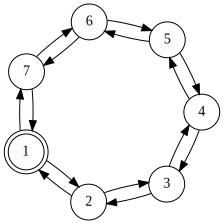

In [113]:
test.view()

### Réduction du cercle

In [116]:
test.reduire()

### Et le survivant est...

In [117]:
test.survivant()

7

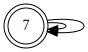

In [118]:
test.view()